In [1]:
# Astronomy Python Session 2: Pandas DataFrames, Loops, and Conditionals

# Cell 1: Introduction to Pandas DataFrames
# Pandas is essential for astronomical data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Part 1: Creating a DataFrame with astronomical data

In [6]:
# This represents a small catalog of exoplanets

# First, we create a dictionary with our data
exoplanet_data = {
    'name': ['Kepler-186f', 'TRAPPIST-1e', 'Proxima Centauri b', 'TOI-700 d', 'HD 219134 b'],
    'distance_ly': [582, 39, 4.2, 101.5, 21.3],
    'radius_earth': [1.17, 0.91, 1.08, 1.19, 1.6],
    'orbital_period_days': [129.9, 6.1, 11.2, 37.4, 3.1],
    'star_type': ['M dwarf', 'M dwarf', 'M dwarf', 'M dwarf', 'K dwarf'],
    'potentially_habitable': [True, True, True, True, False]
}


In [3]:
# Converting to a DataFrame
exoplanets_df = pd.DataFrame(exoplanet_data)

In [5]:
# Display the DataFrame
exoplanets_df

,name,distance_ly,radius_earth,orbital_period_days,star_type,potentially_habitable
0,Kepler-186f,582.0,1.17,129.9,M dwarf,True
1,TRAPPIST-1e,39.0,0.91,6.1,M dwarf,True
2,Proxima Centauri b,4.2,1.08,11.2,M dwarf,True
3,TOI-700 d,101.5,1.19,37.4,M dwarf,True
4,HD 219134 b,21.3,1.60,3.1,K dwarf,False


# Part 2: Basic DataFrame Operations


In [7]:
# Common operations used in astronomy data analysis

# Getting information about the DataFrame
print("\nDataFrame Information:")
print(exoplanets_df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5 non-null      object 
 1   distance_ly            5 non-null      float64
 2   radius_earth           5 non-null      float64
 3   orbital_period_days    5 non-null      float64
 4   star_type              5 non-null      object 
 5   potentially_habitable  5 non-null      bool   
dtypes: bool(1), float64(3), object(2)
memory usage: 333.0+ bytes
None


In [8]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(exoplanets_df.describe())


Summary Statistics:
       distance_ly  radius_earth  orbital_period_days
count     5.000000       5.00000             5.000000
mean    149.600000       1.19000            37.540000
std     244.498354       0.25446            53.382516
min       4.200000       0.91000             3.100000
25%      21.300000       1.08000             6.100000
50%      39.000000       1.17000            11.200000
75%     101.500000       1.19000            37.400000
max     582.000000       1.60000           129.900000


In [9]:
# Accessing specific columns
print("\nExoplanet Distances (light-years):")
print(exoplanets_df['distance_ly'])


Exoplanet Distances (light-years):
0    582.0
1     39.0
2      4.2
3    101.5
4     21.3
Name: distance_ly, dtype: float64


In [10]:
# Accessing specific rows by index
print("\nSecond exoplanet in our catalog:")
print(exoplanets_df.iloc[1])


Second exoplanet in our catalog:
name                     TRAPPIST-1e
distance_ly                     39.0
radius_earth                    0.91
orbital_period_days              6.1
star_type                    M dwarf
potentially_habitable           True
Name: 1, dtype: object


In [11]:
# Accessing data by row and column
print("\nThe radius of Proxima Centauri b:")
proxima_row = exoplanets_df[exoplanets_df['name'] == 'Proxima Centauri b'].index[0]
print(exoplanets_df.loc[proxima_row, 'radius_earth'], "Earth radii")


The radius of Proxima Centauri b:
1.08 Earth radii


# Part 3: DataFrame Manipulation

In [12]:
# How to filter, sort, and modify astronomical data

# Filtering data - find potentially habitable planets
habitable_planets = exoplanets_df[exoplanets_df['potentially_habitable'] == True]
print("Potentially Habitable Planets:")
print(habitable_planets[['name', 'distance_ly', 'radius_earth']])

Potentially Habitable Planets:
                 name  distance_ly  radius_earth
0         Kepler-186f        582.0          1.17
1         TRAPPIST-1e         39.0          0.91
2  Proxima Centauri b          4.2          1.08
3           TOI-700 d        101.5          1.19


In [13]:
# Sorting data - from nearest to farthest
sorted_by_distance = exoplanets_df.sort_values('distance_ly')
print("\nPlanets Sorted by Distance:")
print(sorted_by_distance[['name', 'distance_ly']])


Planets Sorted by Distance:
                 name  distance_ly
2  Proxima Centauri b          4.2
4         HD 219134 b         21.3
1         TRAPPIST-1e         39.0
3           TOI-700 d        101.5
0         Kepler-186f        582.0


In [14]:
# Adding a new column - calculated field
# Converting light-years to parsecs (1 ly ≈ 0.307 parsecs)
exoplanets_df['distance_parsecs'] = exoplanets_df['distance_ly'] * 0.307
print("\nDataFrame with distance in parsecs:")
print(exoplanets_df[['name', 'distance_ly', 'distance_parsecs']])


DataFrame with distance in parsecs:
                 name  distance_ly  distance_parsecs
0         Kepler-186f        582.0          178.6740
1         TRAPPIST-1e         39.0           11.9730
2  Proxima Centauri b          4.2            1.2894
3           TOI-700 d        101.5           31.1605
4         HD 219134 b         21.3            6.5391


# Part 4: For Loops

In [16]:
# Iterating through astronomical data

# Loop through all planets and print their details
print("\nIterating through planets:")
for index, planet in exoplanets_df.iterrows():
    print(f"Planet: {planet['name']}")
    print(f"  Distance: {planet['distance_ly']} light-years")
    print(f"  Radius: {planet['radius_earth']} Earth radii")
    print(f"  Orbital period: {planet['orbital_period_days']} days")
    print("---")


Iterating through planets:
Planet: Kepler-186f
  Distance: 582.0 light-years
  Radius: 1.17 Earth radii
  Orbital period: 129.9 days
---
Planet: TRAPPIST-1e
  Distance: 39.0 light-years
  Radius: 0.91 Earth radii
  Orbital period: 6.1 days
---
Planet: Proxima Centauri b
  Distance: 4.2 light-years
  Radius: 1.08 Earth radii
  Orbital period: 11.2 days
---
Planet: TOI-700 d
  Distance: 101.5 light-years
  Radius: 1.19 Earth radii
  Orbital period: 37.4 days
---
Planet: HD 219134 b
  Distance: 21.3 light-years
  Radius: 1.6 Earth radii
  Orbital period: 3.1 days
---


In [17]:
# Computing custom values in a loop
print("\nCalculating surface gravity estimates:")
# Assume Earth's surface gravity is 9.8 m/s²
# A crude approximation: gravity scales with radius
for index, planet in exoplanets_df.iterrows():
    # Very simplified gravity calculation
    approx_gravity = 9.8 * planet['radius_earth']
    print(f"{planet['name']}: ~{approx_gravity:.1f} m/s²")


Calculating surface gravity estimates:
Kepler-186f: ~11.5 m/s²
TRAPPIST-1e: ~8.9 m/s²
Proxima Centauri b: ~10.6 m/s²
TOI-700 d: ~11.7 m/s²
HD 219134 b: ~15.7 m/s²


# Part 5: If Statements

In [19]:
# Making decisions based on astronomical data

print("\nClassifying planets by distance:")

for index, planet in exoplanets_df.iterrows():
    if planet['distance_ly'] < 10:
        category = "Very nearby"
    elif planet['distance_ly'] < 50:
        category = "Nearby"
    elif planet['distance_ly'] < 100:
        category = "Intermediate distance"
    else:
        category = "Distant"
    
    print(f"{planet['name']} - {category}")


Classifying planets by distance:
Kepler-186f - Distant
TRAPPIST-1e - Nearby
Proxima Centauri b - Very nearby
TOI-700 d - Distant
HD 219134 b - Nearby


In [20]:
# Classifying by multiple conditions
print("\nExoplanet habitability assessment:")
for index, planet in exoplanets_df.iterrows():
    if planet['potentially_habitable'] and planet['distance_ly'] < 50:
        assessment = "High-priority target for further study"
    elif planet['potentially_habitable']:
        assessment = "Interesting target, but challenging to observe"
    else:
        assessment = "Not a primary habitability target"
    
    print(f"{planet['name']}: {assessment}")


Exoplanet habitability assessment:
Kepler-186f: Interesting target, but challenging to observe
TRAPPIST-1e: High-priority target for further study
Proxima Centauri b: High-priority target for further study
TOI-700 d: Interesting target, but challenging to observe
HD 219134 b: Not a primary habitability target


# Part 6: While Loops

In [21]:
# While loops can be useful for astronomical simulations

# Simple orbital position simulation
print("\nSimulating orbital positions:")

# Let's simulate the position of a planet over time
planet_name = "TRAPPIST-1e"
planet_data = exoplanets_df[exoplanets_df['name'] == planet_name].iloc[0]
orbital_period = planet_data['orbital_period_days']

# Simulation parameters
time = 0
time_step = 1  # day
max_time = 15  # days
orbital_angle = 0

print(f"Orbital simulation for {planet_name} (Period: {orbital_period} days)")

while time <= max_time:
    # Calculate orbital angle (in degrees)
    orbital_angle = (time / orbital_period) * 360 % 360
    
    # Simple position calculation (assuming circular orbit)
    x = np.cos(np.radians(orbital_angle))
    y = np.sin(np.radians(orbital_angle))
    
    # Print the time and position
    print(f"Day {time:.1f}: Angle = {orbital_angle:.1f}°, Position = ({x:.2f}, {y:.2f})")
    
    # Increment time
    time += time_step


Simulating orbital positions:
Orbital simulation for TRAPPIST-1e (Period: 6.1 days)
Day 0.0: Angle = 0.0°, Position = (1.00, 0.00)
Day 1.0: Angle = 59.0°, Position = (0.51, 0.86)
Day 2.0: Angle = 118.0°, Position = (-0.47, 0.88)
Day 3.0: Angle = 177.0°, Position = (-1.00, 0.05)
Day 4.0: Angle = 236.1°, Position = (-0.56, -0.83)
Day 5.0: Angle = 295.1°, Position = (0.42, -0.91)
Day 6.0: Angle = 354.1°, Position = (0.99, -0.10)
Day 7.0: Angle = 53.1°, Position = (0.60, 0.80)
Day 8.0: Angle = 112.1°, Position = (-0.38, 0.93)
Day 9.0: Angle = 171.1°, Position = (-0.99, 0.15)
Day 10.0: Angle = 230.2°, Position = (-0.64, -0.77)
Day 11.0: Angle = 289.2°, Position = (0.33, -0.94)
Day 12.0: Angle = 348.2°, Position = (0.98, -0.20)
Day 13.0: Angle = 47.2°, Position = (0.68, 0.73)
Day 14.0: Angle = 106.2°, Position = (-0.28, 0.96)
Day 15.0: Angle = 165.2°, Position = (-0.97, 0.25)


# Part 7: Combining Everything

### Let's now combines all these concepts to do a real-world astronomy data analysis! 


In [23]:
# Set up some analysis variables
nearby_count = 0
habitable_count = 0
m_dwarf_count = 0
total_planets = len(exoplanets_df)

In [24]:
# Let's analyze our exoplanet catalog more comprehensively
print("\nComprehensive Exoplanet Analysis:")

# Loop through the data and analyze
for index, planet in exoplanets_df.iterrows():
    # Check various conditions
    if planet['distance_ly'] < 50:
        nearby_count += 1
        print(f"{planet['name']} is nearby at {planet['distance_ly']} light-years.")
    
    if planet['potentially_habitable']:
        habitable_count += 1
        
        if planet['radius_earth'] > 0.8 and planet['radius_earth'] < 1.5:
            print(f"{planet['name']} is Earth-sized and potentially habitable!")
    
    if planet['star_type'] == 'M dwarf':
        m_dwarf_count += 1

# Print summary statistics
print("\nSummary Statistics:")
print(f"- {nearby_count}/{total_planets} planets are within 50 light-years")
print(f"- {habitable_count}/{total_planets} planets are potentially habitable")
print(f"- {m_dwarf_count}/{total_planets} planets orbit M dwarf stars")

# Calculate the percentage of habitable planets
habitable_percentage = (habitable_count / total_planets) * 100
print(f"- {habitable_percentage:.1f}% of our catalog planets are potentially habitable")


Comprehensive Exoplanet Analysis:
Kepler-186f is Earth-sized and potentially habitable!
TRAPPIST-1e is nearby at 39.0 light-years.
TRAPPIST-1e is Earth-sized and potentially habitable!
Proxima Centauri b is nearby at 4.2 light-years.
Proxima Centauri b is Earth-sized and potentially habitable!
TOI-700 d is Earth-sized and potentially habitable!
HD 219134 b is nearby at 21.3 light-years.

Summary Statistics:
- 3/5 planets are within 50 light-years
- 4/5 planets are potentially habitable
- 4/5 planets orbit M dwarf stars
- 80.0% of our catalog planets are potentially habitable


# Part 8: Basic Visualization

/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_75623/567941643.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn),


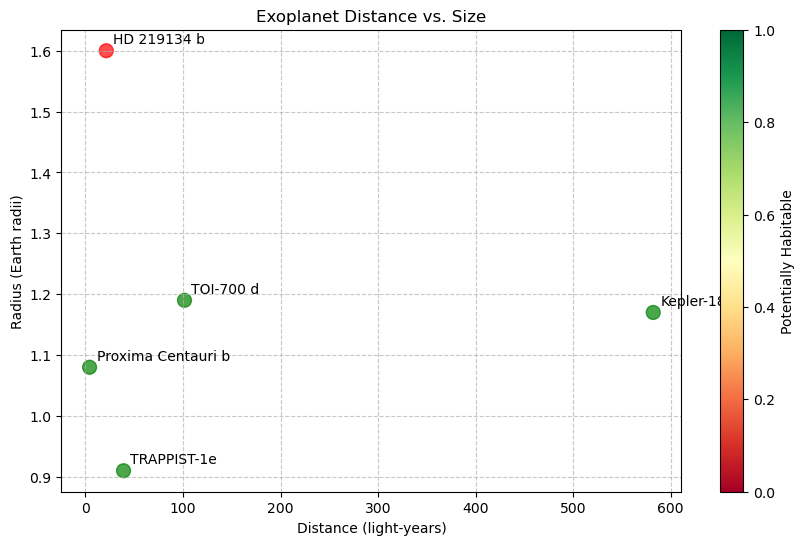

In [25]:
# Visualizing astronomical data

plt.figure(figsize=(10, 6))
plt.scatter(exoplanets_df['distance_ly'], exoplanets_df['radius_earth'], 
            c=exoplanets_df['potentially_habitable'].map({True: 'green', False: 'red'}),
            s=100, alpha=0.7)

# Add planet names as labels
for i, txt in enumerate(exoplanets_df['name']):
    plt.annotate(txt, (exoplanets_df['distance_ly'][i], exoplanets_df['radius_earth'][i]),
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Distance (light-years)')
plt.ylabel('Radius (Earth radii)')
plt.title('Exoplanet Distance vs. Size')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn), 
             label='Potentially Habitable')

# Astronomy Python Session 2 Homework
## DataFrames, Loops, and Conditionals for Astronomical Data Analysis

### Overview
This homework will build on the skills learned in Sessions 1 and 2, focusing on using pandas DataFrames and control structures (for loops, if statements, while loops) to analyze astronomical data. You'll work with a dataset of stars and perform various analyses.

---

### Part 1: Setting Up Your Data

**Task 1.1: Create a Star Catalog DataFrame**

Create a pandas DataFrame containing information about at least 8 stars with the following columns:
- `name` (string): Star name
- `distance_ly` (float): Distance in light-years
- `spectral_type` (string): O, B, A, F, G, K, or M
- `temperature_K` (integer): Surface temperature in Kelvin
- `mass_solar` (float): Mass in solar masses
- `luminosity_solar` (float): Luminosity relative to the Sun
- `has_planets` (boolean): Whether the star has known planets

Use the variable creation skills from Session 1 to define your initial data.

**Task 1.2: Add Calculated Columns**

Add two new columns to your DataFrame:
- `distance_parsecs`: Convert the distance from light-years to parsecs (1 ly ≈ 0.307 parsecs)
- `absolute_magnitude`: Calculate using the formula:
  M = 4.83 - 2.5 * log10(luminosity_solar)

Display the resulting DataFrame.

---

### Part 2: Loop-Based Analysis

**Task 2.1: Star Classification Loop**

Write a for loop that iterates through each star in your DataFrame and classifies it based on temperature:
- O stars: > 30,000 K
- B stars: 10,000 - 30,000 K
- A stars: 7,500 - 10,000 K
- F stars: 6,000 - 7,500 K
- G stars: 5,200 - 6,000 K
- K stars: 3,700 - 5,200 K
- M stars: < 3,700 K

Compare your classification with the spectral_type column and print whether they match.

**Task 2.2: Star Statistics**

Using loops and conditionals, determine and print:
- The number of stars in each spectral class
- The average mass for each spectral class
- The star(s) with the highest luminosity
- All stars within 20 light-years that have planets

---
## Bonus Questions:

### Part 3: While Loop Simulation

**Task 3.1: Binary Star Orbit Simulation**

Create a simple simulation of two stars orbiting each other:
1. Choose parameters for a binary star system (masses, orbital period, orbital radius)
2. Use a while loop to simulate at least 10 orbits
3. Calculate and print the position of both stars at regular intervals
4. Optional: Plot the orbital paths

**Task 3.2: Stellar Evolution**

Create a simple stellar evolution simulation using a while loop:
1. Start with a star of 1 solar mass
2. Estimate its main sequence lifetime (approximately 10 billion years for a Sun-like star)
3. Simulate the star's evolution in time steps of 1 billion years
4. At each step, calculate and print the star's:
   - Age
   - Remaining lifetime
   - Temperature (assume it increases slightly over time)
   - Luminosity (assume it increases over time)
5. End the simulation when the star reaches the end of its main sequence lifetime

---

### Part 4: Advanced DataFrame Operations

**Task 4.1: Stellar Neighborhood Analysis**

Filter your DataFrame to create a new DataFrame containing only stars within 50 light-years.
- Sort this DataFrame by mass
- Create a new column showing the ratio of mass to luminosity
- Calculate descriptive statistics for this subset

**Task 4.2: Main Sequence Comparison**

The main sequence of stars follows an approximate relationship between mass and luminosity:
luminosity ∝ mass^3.5

Create a new column in your DataFrame that calculates the expected luminosity based on this relationship. Then:
1. Compare the expected vs. actual luminosity for each star
2. Calculate the percentage difference
3. Identify stars that deviate significantly (>20%) from the main sequence relationship
4. Explain possible reasons for these deviations


Create your own formula incorporating these factors and apply it to rank the stars in your catalog from most to least potentially habitable for life.